<a href="https://www.kaggle.com/code/daanishhindustani/brain-tumor-detection?scriptVersionId=148520575" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import os
from IPython.display import clear_output
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
clear_output()

In [2]:
import numpy as np 
import pandas as pd
import pathlib 
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import tensorflow as tf
from tensorflow.keras import utils,layers, Sequential
import cv2

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# GPU CONFIG

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# Get and Classify Data

In [4]:
url = "/kaggle/input/brain-tumors-256x256/Data/"

In [5]:
data = pathlib.Path(url)

In [6]:
disease = {
    "glioma_tumor": list(data.glob('glioma_tumor/*.jpg')),
    "meningioma_tumor": list(data.glob('meningioma_tumor/*.jpg')),
    "normal": list(data.glob('normal/*.jpg')),
    "pituitary_tumor" : list(data.glob('pituitary_tumor/*.jpg')),       

}

In [7]:
labels = {
    "glioma_tumor" : 0,
    "meningioma_tumor":1,
    "normal":2,
    "pituitary_tumor":3
}

In [8]:
print(str(disease["glioma_tumor"][:5]))
clear_output()

# Display Data

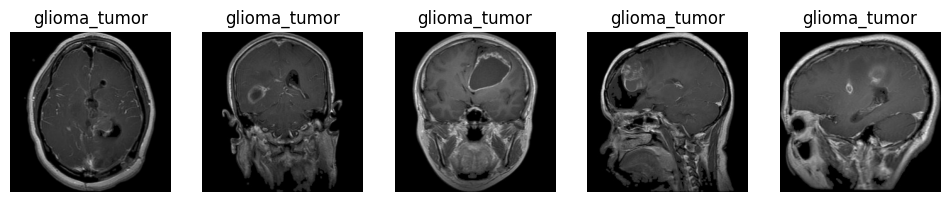

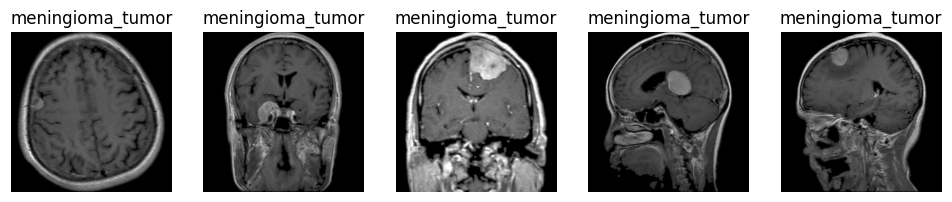

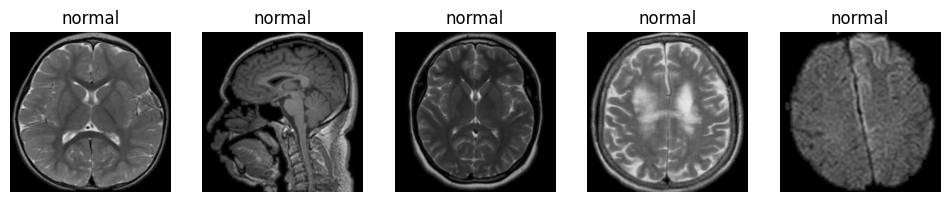

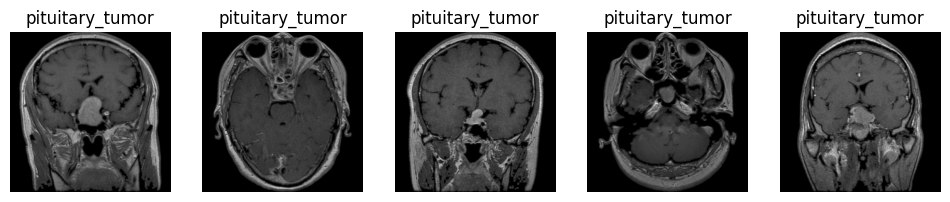

In [9]:
def display_sample_images(sample_title, num_samples=5):
    plt.figure(figsize=(12, 4))
    img_lst = disease[sample_title][:num_samples]
    for i, image in enumerate(img_lst):
        img = mpimg.imread(str(image))
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(sample_title)
        plt.axis('off')
    plt.show()
    
display_sample_images("glioma_tumor")
display_sample_images("meningioma_tumor")
display_sample_images("normal")
display_sample_images("pituitary_tumor")
    



# Format Data

In [10]:
X = []
Y = []
for name, diseases in disease.items():
    for disease in diseases:
        img = cv2.imread(str(disease))
        img = img.astype('float32') / 255.0
        X.append(img)
        Y.append(labels[name])     
        
        

In [11]:
X = np.array(X)
Y = np.array(Y)

In [12]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

# Build Model

In [13]:
model = Sequential([
    #CNN layer
    layers.Conv2D(16,(3,3),padding="same",activation="relu",input_shape=(256,256,3)),
    layers.MaxPooling2D(),
    #ANN layer
    layers.Flatten(),
    layers.Dense(256,activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(4,activation='softmax')
])


In [14]:
model.compile(
    optimizer='adam',
    loss  = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train Model

In [15]:
model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
78/78 [==============================] - 9s 24ms/step - loss: 5.0936 - accuracy: 0.4006
Epoch 2/5
78/78 [==============================] - 2s 23ms/step - loss: 0.9445 - accuracy: 0.5981
Epoch 3/5
78/78 [==============================] - 2s 23ms/step - loss: 0.6845 - accuracy: 0.7387
Epoch 4/5
78/78 [==============================] - 2s 23ms/step - loss: 0.4722 - accuracy: 0.8308
Epoch 5/5
78/78 [==============================] - 2s 23ms/step - loss: 0.3169 - accuracy: 0.8938


# Test Model

In [16]:
model.evaluate(X_test,Y_test)

20/20 [==============================] - 0s 14ms/step - loss: 0.6328 - accuracy: 0.7677


[0.6327869892120361, 0.7677419185638428]

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 262144)            0         
                                                                 
 dense (Dense)               (None, 256)               67109120  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                        

# Diagnosising MRI Inputs From Users

In [18]:
mri_scan = "/kaggle/input/images-of-tumor/unknown_tumor.jpg"
img = cv2.imread(mri_scan)
img = img.astype('float32') / 255.0
img = cv2.resize(img, (256, 256))
img = np.array([img])

In [19]:
tumor_prediction = model.predict(img)

1/1 [==============================] - 0s 112ms/step


In [20]:
tumor_labels = ["Glioma Tumor", "Meningioma Tumor", "No Tumors", "Pituitary Tumor"]
highest_probability = np.argmax(tumor_prediction)
diagnosis = tumor_labels[highest_probability]

In [21]:
print(f"Based on the provided MRI, the model has an 82% level of confidence that the diagnosis is {diagnosis}.")

Based on the provided MRI, the model has an 82% level of confidence that the diagnosis is Meningioma Tumor.
